In [1]:
import pandas as pd
df=pd.read_csv('d:/data/iris/iris2.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Result
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [2]:
df['Result'].value_counts()

2    50
1    50
0    50
Name: Result, dtype: int64

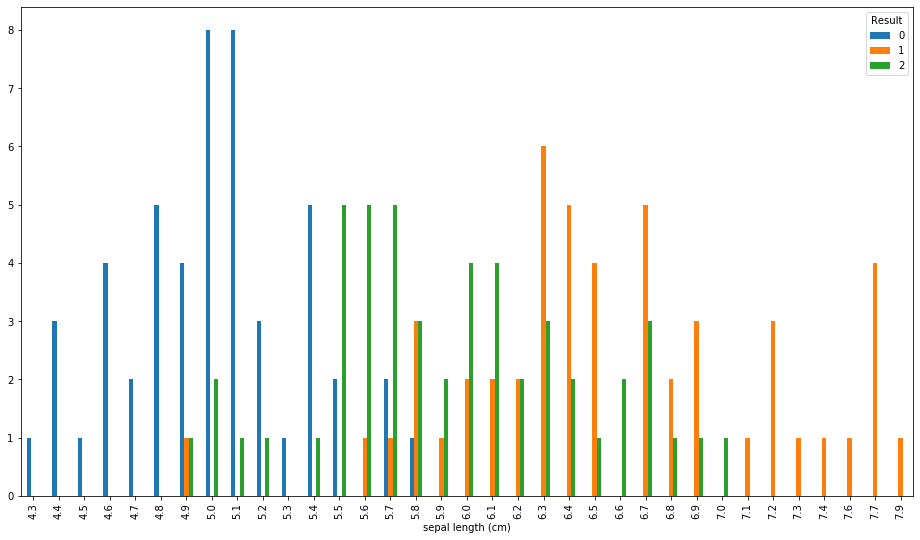

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
#그래프 사이즈 조절(16,9) 가로 16인치, 세로 9인치
plt.rcParams['figure.figsize']=(16,9)
#print(pd.crosstab(df['sepal length (cm)'],df['Result']))
pd.crosstab(df['sepal length (cm)'],df['Result']).plot(kind='bar')

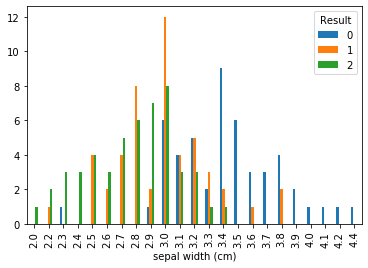

In [4]:
pd.crosstab(df['sepal width (cm)'],df['Result']).plot(kind='bar')

In [5]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'Result'],
      dtype='object')

In [6]:
cols=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']
X=df[cols] #독립변수
y=df['Result'] #종속변수

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=0)
model=DecisionTreeClassifier(random_state=0) #의사결정나무 모형
model.fit(X_train,y_train) #기계학습

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [8]:
print(model.score(X_train,y_train)) #학습용
print(model.score(X_test,y_test)) #검증용

1.0
1.0


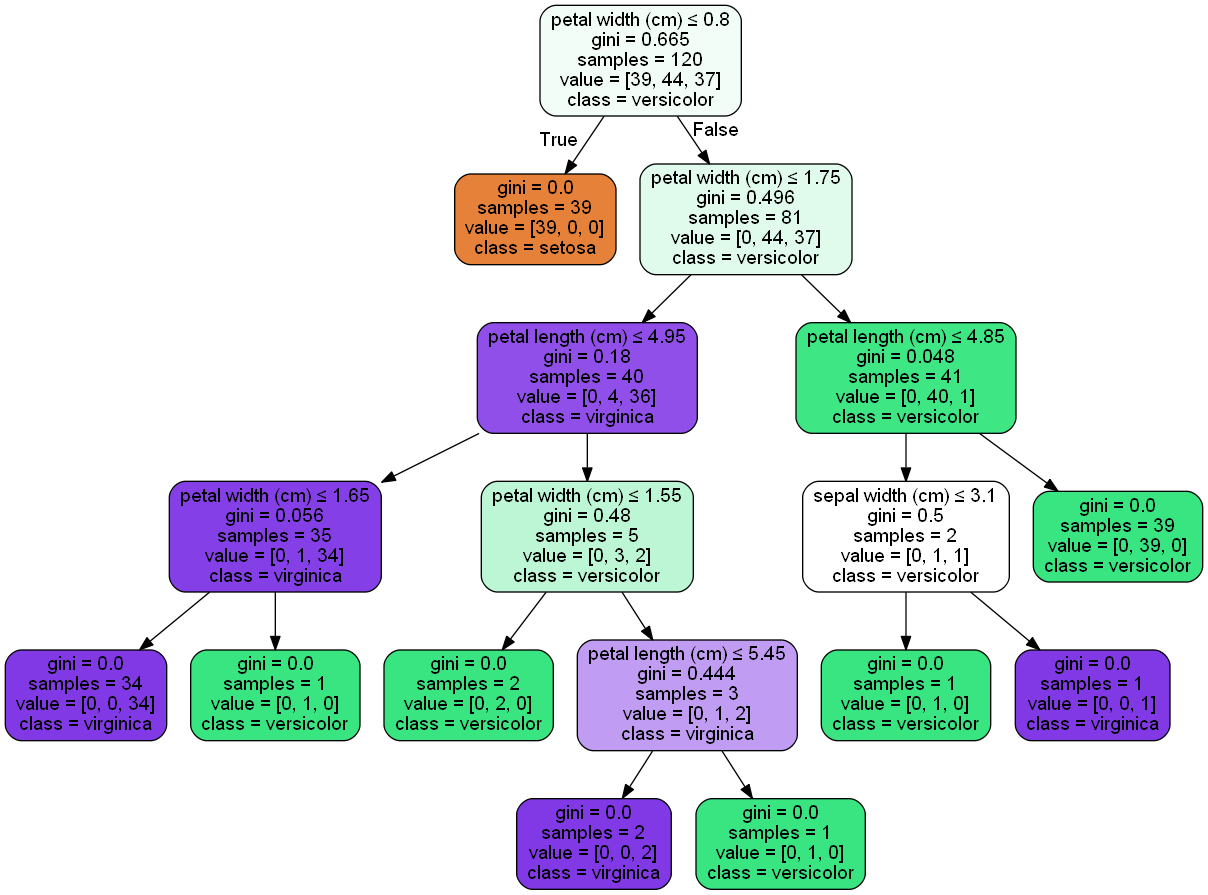

In [9]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
#트리 그래프 출력
#feature_names : 독립변수, class_names 종속변수의 라벨
dot_data=export_graphviz(model,out_file=None,
                        feature_names=cols,
                        class_names=['setosa','versicolor','virginica'],
                        filled=True,rounded=True, special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

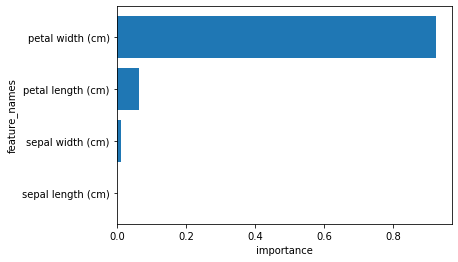

In [15]:
#특성 중요도 그래프
import numpy as np

def plot_tree(model):
    n_features=X.shape[1] #변수 갯수
    plt.barh(range(n_features),model.feature_importances_,
             align='center')
    plt.yticks(np.arange(n_features),cols)
    plt.xlabel('importance')
    plt.ylabel('feature_names')
    
plot_tree(model)

In [17]:
from sklearn.ensemble import RandomForestClassifier
#트리갯수 100개의 랜덤포레스트 모형
forest=RandomForestClassifier(n_estimators=100,random_state=0)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [18]:
print(model.score(X_train,y_train)) #학습용
print(model.score(X_test,y_test)) #검증용

1.0
1.0


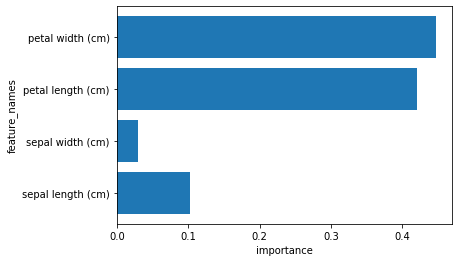

In [19]:
plot_tree(forest) #랜덤포레스트 모형의 특성 중요도 그래프